# Random Forest Regression Model 2
## With data engineering on missing values in 'Critic_Score' column
The missing values in 'Critic_Score' column are substituted with the average critic score values that is generated by grouping the data by their 'Developer_x' and retrieving each group's average score.

### Objective
Predict the number of total sales based on different features

### Target Variable and Features
- Target variable (y) = Total_Sales 
- X = Critic_Score, Genre, ESRB_Rating, Platform, Publisher, Developer_x

### Machine Learning Model
- model = RandomForestRegressor()


In [1]:
# Initial imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from path import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
# Read data
games_df = pd.read_csv('Cleaned_Data/all_columns_df.csv')
games_df

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer_x,Critic_Score,User_Score,Year,Country,Total_Sales
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,2006.0,Japan,82.86
1,2,Super Mario Bros.,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,1985.0,Japan,40.24
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,2008.0,Japan,37.14
3,4,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,2017.0,NaN,36.60
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,2009.0,Japan,33.09
...,...,...,...,...,...,...,...,...,...,...,...,...
19857,19858,FirePower for Microsoft Combat Flight Simulator 3,Simulation,T,PC,GMX Media,Shockwave Productions,NaN,NaN,2004.0,NaN,0.01
19858,19859,Tom Clancy's Splinter Cell,Shooter,T,PC,Ubisoft,Ubisoft,NaN,NaN,2003.0,Europe,0.01
19859,19860,Ashita no Joe 2: The Anime Super Remix,Fighting,NaN,PS2,Capcom,Capcom,NaN,NaN,2002.0,Japan,0.01
19860,19861,Tokyo Yamanote Boys for V: Main Disc,Adventure,NaN,PSV,Rejet,Rejet,NaN,NaN,2017.0,NaN,0.01


In [3]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19862 entries, 0 to 19861
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          19862 non-null  int64  
 1   Name          19862 non-null  object 
 2   Genre         19862 non-null  object 
 3   ESRB_Rating   13925 non-null  object 
 4   Platform      19862 non-null  object 
 5   Publisher     19862 non-null  object 
 6   Developer_x   19860 non-null  object 
 7   Critic_Score  4706 non-null   float64
 8   User_Score    238 non-null    float64
 9   Year          19859 non-null  float64
 10  Country       11877 non-null  object 
 11  Total_Sales   19862 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.8+ MB


## Handle the missing values of 'Critic_Score' column

In [4]:
a = games_df.groupby(['Platform'])['Critic_Score'].mean().to_dict()
games_df['Critic_Score1'] = games_df.Platform.map(a)

In [5]:
b = games_df.groupby(['Publisher'])['Critic_Score'].mean().to_dict()
games_df['Critic_Score2'] = games_df.Publisher.map(b)

In [6]:
c = games_df.groupby(['Developer_x'])['Critic_Score'].mean().to_dict()
games_df['Critic_Score3'] = games_df.Developer_x.map(c)

In [7]:
games_df

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer_x,Critic_Score,User_Score,Year,Country,Total_Sales,Critic_Score1,Critic_Score2,Critic_Score3
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,2006.0,Japan,82.86,6.781214,7.799296,8.379412
1,2,Super Mario Bros.,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,1985.0,Japan,40.24,8.133333,7.799296,8.379412
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,2008.0,Japan,37.14,6.781214,7.799296,8.379412
3,4,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,2017.0,NaN,36.60,7.848899,NaN,NaN
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,2009.0,Japan,33.09,6.781214,7.799296,8.379412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19857,19858,FirePower for Microsoft Combat Flight Simulator 3,Simulation,T,PC,GMX Media,Shockwave Productions,NaN,NaN,2004.0,NaN,0.01,7.848899,NaN,NaN
19858,19859,Tom Clancy's Splinter Cell,Shooter,T,PC,Ubisoft,Ubisoft,NaN,NaN,2003.0,Europe,0.01,7.848899,6.946885,6.606977
19859,19860,Ashita no Joe 2: The Anime Super Remix,Fighting,NaN,PS2,Capcom,Capcom,NaN,NaN,2002.0,Japan,0.01,7.517500,7.726012,7.763810
19860,19861,Tokyo Yamanote Boys for V: Main Disc,Adventure,NaN,PSV,Rejet,Rejet,NaN,NaN,2017.0,NaN,0.01,7.342857,NaN,NaN


In [8]:
games_df.count()

Rank             19862
Name             19862
Genre            19862
ESRB_Rating      13925
Platform         19862
Publisher        19862
Developer_x      19860
Critic_Score      4706
User_Score         238
Year             19859
Country          11877
Total_Sales      19862
Critic_Score1    19686
Critic_Score2    17120
Critic_Score3    15044
dtype: int64

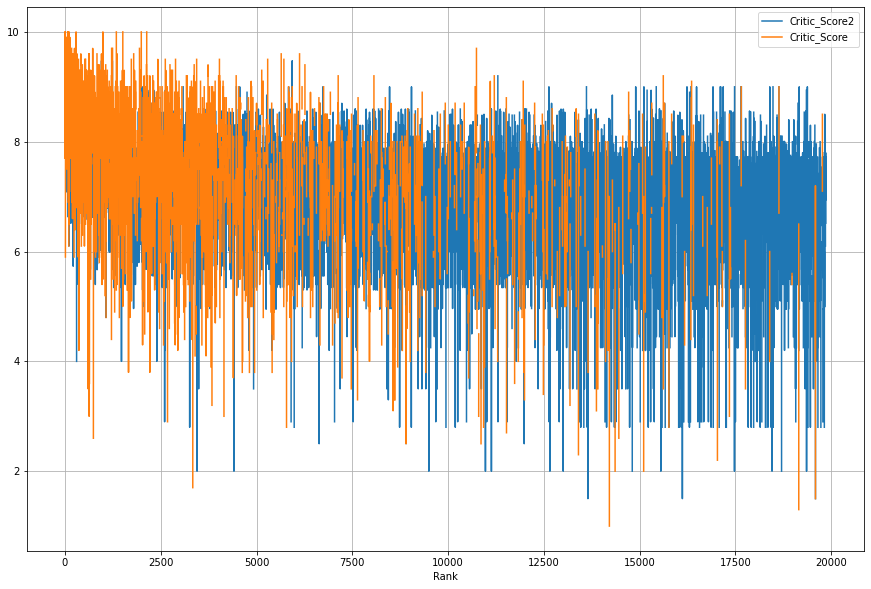

In [9]:
# Compare the grouped's average critic score vs original critic score
games_df.plot(x = 'Rank', y = ['Critic_Score2','Critic_Score'], figsize=(15, 10), grid=True)
plt.show()

In [10]:
critic_df = games_df[['Critic_Score', 'Critic_Score1', 'Critic_Score2', 'Critic_Score3']].dropna()
critic_df

,Critic_Score,Critic_Score1,Critic_Score2,Critic_Score3
0,7.7,6.781214,7.799296,8.379412
1,10.0,8.133333,7.799296,8.379412
2,8.2,6.781214,7.799296,8.379412
4,8.0,6.781214,7.799296,8.379412
5,9.4,8.061538,7.799296,8.522222
...,...,...,...,...
19792,7.0,7.848899,7.093421,8.221053
19794,6.0,6.755333,7.457732,7.740000
19800,6.7,6.755333,5.925000,6.700000
19812,7.0,7.848899,6.946885,7.000000


In [11]:
critic = critic_df.Critic_Score.values
critic1 = critic_df.Critic_Score1.values
critic2 = critic_df.Critic_Score2.values
critic3 = critic_df.Critic_Score3.values

In [12]:
# calculate mean absolute error (average difference between the calculated values and actual values)
from sklearn.metrics import mean_absolute_error as mae
error1 = mae(critic, critic1)
error2 = mae(critic, critic2)
error3 = mae(critic, critic3)

print(f'Mean absolute error Critic1 (platform): {error1}')
print(f'Mean absolute error Critic2 (publisher): {error2}')
print(f'Mean absolute error Critic3 (developer): {error3}')

Mean absolute error Critic1 (platform): 1.0748038667053657
Mean absolute error Critic2 (publisher): 0.9816289424884469
Mean absolute error Critic3 (developer): 0.6805053612644535


In [13]:
# Create another column for new critic score where the NaNs are substituted with avg critic score grouped by developer
games_df['Critic_Score_new'] = np.where(games_df.Critic_Score.isna() == True, games_df.Critic_Score3, games_df.Critic_Score)

In [14]:
games_df

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer_x,Critic_Score,User_Score,Year,Country,Total_Sales,Critic_Score1,Critic_Score2,Critic_Score3,Critic_Score_new
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,2006.0,Japan,82.86,6.781214,7.799296,8.379412,7.700000
1,2,Super Mario Bros.,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,1985.0,Japan,40.24,8.133333,7.799296,8.379412,10.000000
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,2008.0,Japan,37.14,6.781214,7.799296,8.379412,8.200000
3,4,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,2017.0,NaN,36.60,7.848899,NaN,NaN,NaN
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,2009.0,Japan,33.09,6.781214,7.799296,8.379412,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19857,19858,FirePower for Microsoft Combat Flight Simulator 3,Simulation,T,PC,GMX Media,Shockwave Productions,NaN,NaN,2004.0,NaN,0.01,7.848899,NaN,NaN,NaN
19858,19859,Tom Clancy's Splinter Cell,Shooter,T,PC,Ubisoft,Ubisoft,NaN,NaN,2003.0,Europe,0.01,7.848899,6.946885,6.606977,6.606977
19859,19860,Ashita no Joe 2: The Anime Super Remix,Fighting,NaN,PS2,Capcom,Capcom,NaN,NaN,2002.0,Japan,0.01,7.517500,7.726012,7.763810,7.763810
19860,19861,Tokyo Yamanote Boys for V: Main Disc,Adventure,NaN,PSV,Rejet,Rejet,NaN,NaN,2017.0,NaN,0.01,7.342857,NaN,NaN,NaN


In [15]:
# Change 'Year' dtype to object
games_df['Year'] = pd.to_datetime(games_df['Year'], format = '%Y').dt.strftime('%Y')

In [16]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19862 entries, 0 to 19861
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank              19862 non-null  int64  
 1   Name              19862 non-null  object 
 2   Genre             19862 non-null  object 
 3   ESRB_Rating       13925 non-null  object 
 4   Platform          19862 non-null  object 
 5   Publisher         19862 non-null  object 
 6   Developer_x       19860 non-null  object 
 7   Critic_Score      4706 non-null   float64
 8   User_Score        238 non-null    float64
 9   Year              19859 non-null  object 
 10  Country           11877 non-null  object 
 11  Total_Sales       19862 non-null  float64
 12  Critic_Score1     19686 non-null  float64
 13  Critic_Score2     17120 non-null  float64
 14  Critic_Score3     15044 non-null  float64
 15  Critic_Score_new  15044 non-null  float64
dtypes: float64(7), int64(1), object(8)
memor

In [17]:
# Check correlation between 'Critic_Score_new' and 'Total_Sales'
d = games_df[['Critic_Score_new', 'Total_Sales']]
d.corr()

,Critic_Score_new,Total_Sales
Critic_Score_new,1.000000,0.228101
Total_Sales,0.228101,1.000000


In [18]:
# Drop columns
games_df.drop(['Rank',
               'Name',
               'User_Score',
               'Critic_Score',
               'Critic_Score1',
               'Critic_Score2',
               'Critic_Score3',
               'Country',
               'Year'
              ], axis=1, inplace=True)

In [19]:
games_df.count()

Genre               19862
ESRB_Rating         13925
Platform            19862
Publisher           19862
Developer_x         19860
Total_Sales         19862
Critic_Score_new    15044
dtype: int64

In [20]:
games_df.dropna().count()

Genre               11293
ESRB_Rating         11293
Platform            11293
Publisher           11293
Developer_x         11293
Total_Sales         11293
Critic_Score_new    11293
dtype: int64

In [21]:
games_df = games_df.dropna()
games_df.head(10)

,Genre,ESRB_Rating,Platform,Publisher,Developer_x,Total_Sales,Critic_Score_new
0,Sports,E,Wii,Nintendo,Nintendo EAD,82.86,7.7
2,Racing,E,Wii,Nintendo,Nintendo EAD,37.14,8.2
4,Sports,E,Wii,Nintendo,Nintendo EAD,33.09,8.0
5,Role-Playing,E,GB,Nintendo,Game Freak,31.38,9.4
6,Platform,E,DS,Nintendo,Nintendo EAD,30.80,9.1
8,Platform,E,Wii,Nintendo,Nintendo EAD,30.22,8.6
11,Misc,E,Wii,Nintendo,Nintendo EAD,28.02,5.9
12,Party,E,X360,Microsoft Game Studios,Good Science Studio,24.00,6.7
13,Simulation,E,DS,Nintendo,Nintendo EAD,23.96,8.4
14,Racing,E,DS,Nintendo,Nintendo EAD,23.60,9.1


## Bin and Encode Categorical Features

In [22]:
games_df.nunique()

Genre                 20
ESRB_Rating            6
Platform              30
Publisher            320
Developer_x         1078
Total_Sales          623
Critic_Score_new     387
dtype: int64

In [23]:
games_df.Genre.value_counts()

Action              1932
Sports              1669
Shooter             1127
Role-Playing        1025
Racing              1005
Misc                 827
Platform             785
Adventure            692
Fighting             605
Simulation           530
Strategy             395
Puzzle               320
Action-Adventure     229
Music                 92
MMO                   29
Party                 22
Visual Novel           6
Sandbox                1
Board Game             1
Education              1
Name: Genre, dtype: int64

In [24]:
# Keep top 14 of Genre
top_Genre = games_df.Genre.value_counts().index[0:14]
games_df.Genre = np.where(games_df.Genre.isin(top_Genre), games_df.Genre, 'other')
games_df.Genre.value_counts()

/var/folders/gd/1878fbxd5zs899fs6znx1h_40000gn/T/ipykernel_68966/1843521718.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_df.Genre = np.where(games_df.Genre.isin(top_Genre), games_df.Genre, 'other')


In [26]:
games_df.Platform.value_counts()

PS2     1427
DS      1075
X360    1037
PS3      931
Wii      856
PC       851
PS       722
XB       682
GBA      622
PSP      584
GC       499
PS4      486
XOne     332
3DS      310
N64      259
NS       154
PSV      150
WiiU     131
SAT       50
GB        46
DC        31
SNES      29
PSN        8
GBC        8
XBL        5
GEN        3
VC         2
NES        1
SCD        1
3DO        1
Name: Platform, dtype: int64

In [27]:
# Keep top 18 Platform
#top_Platform = games_df.Platform.value_counts().where(games_df.Platform.value_counts() > 100).index
top_Platform = games_df.Platform.value_counts().index[0:18]
games_df.Platform = np.where(games_df.Platform.isin(top_Platform), games_df.Platform, 'other')
games_df.Platform.value_counts()

/var/folders/gd/1878fbxd5zs899fs6znx1h_40000gn/T/ipykernel_68966/3864539743.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_df.Platform = np.where(games_df.Platform.isin(top_Platform), games_df.Platform, 'other')


PS2      1427
DS       1075
X360     1037
PS3       931
Wii       856
PC        851
PS        722
XB        682
GBA       622
PSP       584
GC        499
PS4       486
XOne      332
3DS       310
N64       259
other     185
NS        154
PSV       150
WiiU      131
Name: Platform, dtype: int64

In [28]:
games_df.Publisher.value_counts()

Activision               832
Ubisoft                  760
Electronic Arts          724
THQ                      594
Nintendo                 532
                        ... 
AQ Interactive             1
Activision Value           1
Matt Makes Games Inc.      1
Detn8 Games                1
Astragon                   1
Name: Publisher, Length: 320, dtype: int64

In [29]:
# Keep top 15 Publisher
top_Publisher = games_df.Publisher.value_counts().index[0:15]
games_df.Publisher = np.where(games_df.Publisher.isin(top_Publisher), games_df.Publisher, 'other')
games_df.Publisher.value_counts()

/var/folders/gd/1878fbxd5zs899fs6znx1h_40000gn/T/ipykernel_68966/556782955.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_df.Publisher = np.where(games_df.Publisher.isin(top_Publisher), games_df.Publisher, 'other')


other                          4786
Activision                      832
Ubisoft                         760
Electronic Arts                 724
THQ                             594
Nintendo                        532
EA Sports                       500
Konami                          429
Sega                            427
Sony Computer Entertainment     397
Capcom                          356
Midway Games                    208
Atari                           204
Square Enix                     196
Atlus                           177
2K Sports                       171
Name: Publisher, dtype: int64

In [30]:
games_df.Developer_x.value_counts()

EA Canada                               277
Capcom                                  232
Konami                                  201
EA Tiburon                              191
Ubisoft Montreal                        159
                                       ... 
1C Company                                1
SourceNext                                1
Introversion                              1
Equinoxe                                  1
Blue Byte Software / Related Designs      1
Name: Developer_x, Length: 1078, dtype: int64

In [31]:
# Keep top 15 Developer_x
top_Developer_x = games_df.Developer_x.value_counts().index[0:15]
games_df.Developer_x = np.where(games_df.Developer_x.isin(top_Developer_x), games_df.Developer_x, 'other')
games_df.Developer_x.value_counts()

/var/folders/gd/1878fbxd5zs899fs6znx1h_40000gn/T/ipykernel_68966/2239024486.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_df.Developer_x = np.where(games_df.Developer_x.isin(top_Developer_x), games_df.Developer_x, 'other')


other                9190
EA Canada             277
Capcom                232
Konami                201
EA Tiburon            191
Ubisoft Montreal      159
Ubisoft               157
Traveller's Tales     150
Visual Concepts       131
Omega Force           111
Square Enix            90
Vicarious Visions      88
Namco                  82
Unknown                80
THQ                    79
Nintendo EAD           75
Name: Developer_x, dtype: int64

In [32]:
games_df.nunique()

Genre                15
ESRB_Rating           6
Platform             19
Publisher            16
Developer_x          16
Total_Sales         623
Critic_Score_new    387
dtype: int64

In [33]:
games_df

,Genre,ESRB_Rating,Platform,Publisher,Developer_x,Total_Sales,Critic_Score_new
0,Sports,E,Wii,Nintendo,Nintendo EAD,82.86,7.700000
2,Racing,E,Wii,Nintendo,Nintendo EAD,37.14,8.200000
4,Sports,E,Wii,Nintendo,Nintendo EAD,33.09,8.000000
5,Role-Playing,E,other,Nintendo,other,31.38,9.400000
6,Platform,E,DS,Nintendo,Nintendo EAD,30.80,9.100000
...,...,...,...,...,...,...,...
19823,Adventure,E10,PC,other,other,0.01,6.600000
19838,Strategy,T,PC,Sega,other,0.01,7.692857
19840,Misc,E10,PS4,other,other,0.01,7.000000
19856,Platform,E,3DS,Nintendo,other,0.01,7.200000


In [34]:
games_df.dtypes

Genre                object
ESRB_Rating          object
Platform             object
Publisher            object
Developer_x          object
Total_Sales         float64
Critic_Score_new    float64
dtype: object

In [36]:
# Encoding object dtype columns
cat = games_df.select_dtypes(include='object')
cat = list(cat.columns)
cat

['Genre', 'ESRB_Rating', 'Platform', 'Publisher', 'Developer_x']

In [37]:
from sklearn.preprocessing import OneHotEncoder

# creating instance of one-hot-encoder
enc = OneHotEncoder(sparse=False)
# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(games_df[cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(cat)

encode_df

/opt/anaconda3/envs/mlenv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Genre_Action,Genre_Action-Adventure,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Music,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,...,Developer_x_Omega Force,Developer_x_Square Enix,Developer_x_THQ,Developer_x_Traveller's Tales,Developer_x_Ubisoft,Developer_x_Ubisoft Montreal,Developer_x_Unknown,Developer_x_Vicarious Visions,Developer_x_Visual Concepts,Developer_x_other
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11288,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11290,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11291,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [38]:
# Reset X dataframe index to merge with encode_df
games_df.reset_index(drop=True, inplace=True)
games_df

,Genre,ESRB_Rating,Platform,Publisher,Developer_x,Total_Sales,Critic_Score_new
0,Sports,E,Wii,Nintendo,Nintendo EAD,82.86,7.700000
1,Racing,E,Wii,Nintendo,Nintendo EAD,37.14,8.200000
2,Sports,E,Wii,Nintendo,Nintendo EAD,33.09,8.000000
3,Role-Playing,E,other,Nintendo,other,31.38,9.400000
4,Platform,E,DS,Nintendo,Nintendo EAD,30.80,9.100000
...,...,...,...,...,...,...,...
11288,Adventure,E10,PC,other,other,0.01,6.600000
11289,Strategy,T,PC,Sega,other,0.01,7.692857
11290,Misc,E10,PS4,other,other,0.01,7.000000
11291,Platform,E,3DS,Nintendo,other,0.01,7.200000


In [39]:
# Merge one-hot encoded features and drop the originals
games_df = games_df.merge(encode_df, left_index=True, right_index=True)
games_df = games_df.drop(cat,1)
games_df

/var/folders/gd/1878fbxd5zs899fs6znx1h_40000gn/T/ipykernel_68966/2140457911.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  games_df = games_df.drop(cat,1)


,Total_Sales,Critic_Score_new,Genre_Action,Genre_Action-Adventure,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Music,Genre_Platform,Genre_Puzzle,...,Developer_x_Omega Force,Developer_x_Square Enix,Developer_x_THQ,Developer_x_Traveller's Tales,Developer_x_Ubisoft,Developer_x_Ubisoft Montreal,Developer_x_Unknown,Developer_x_Vicarious Visions,Developer_x_Visual Concepts,Developer_x_other
0,82.86,7.700000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,37.14,8.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,33.09,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,31.38,9.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,30.80,9.100000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11288,0.01,6.600000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11289,0.01,7.692857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11290,0.01,7.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11291,0.01,7.200000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [40]:
X = games_df.drop('Total_Sales', axis = 1)
y = games_df['Total_Sales'].values

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [42]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [43]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=128, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [44]:
score = regressor.score(X_train, y_train)
print("R-squared:", score) 

R-squared: 0.8613786587648554


In [45]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.5726070626652936
Mean Squared Error: 1.7000804774950025
Root Mean Squared Error: 1.3038713423858208


In [46]:
sorted(zip(regressor.feature_importances_, X.columns), reverse=True)

[(0.3297089899037751, 'Critic_Score_new'),
 (0.1100695145252452, 'Developer_x_Nintendo EAD'),
 (0.09512975975039434, 'Genre_Sports'),
 (0.04736779650602083, 'Publisher_Nintendo'),
 (0.04101027591776628, 'Platform_Wii'),
 (0.0253505313152647, 'Platform_X360'),
 (0.023467322539227908, 'Genre_Role-Playing'),
 (0.018979634271313023, 'Platform_other'),
 (0.0184388473288689, 'ESRB_Rating_E'),
 (0.017129313002320724, 'Genre_Platform'),
 (0.01685584725165941, 'Platform_DS'),
 (0.016213888032125902, 'Genre_Racing'),
 (0.014736389514737401, 'Platform_PS4'),
 (0.014731016452320625, 'Publisher_Activision'),
 (0.013365769591642937, 'Publisher_other'),
 (0.012245785787842097, 'Genre_Shooter'),
 (0.011982815749800695, 'Genre_Misc'),
 (0.011336304392053334, 'ESRB_Rating_T'),
 (0.01028889019292932, 'ESRB_Rating_M'),
 (0.008831954388619282, 'Genre_Action'),
 (0.008481644646528851, 'Genre_Adventure'),
 (0.008145494143081298, 'Publisher_Electronic Arts'),
 (0.007875225970486063, 'Platform_PS2'),
 (0.00768

(0.0, 0.35)

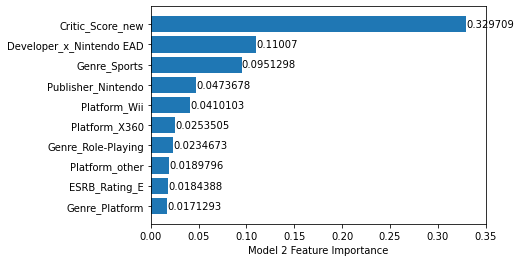

In [51]:
sorted_idx = regressor.feature_importances_.argsort()[-10:]
x = X.columns[sorted_idx]
y = regressor.feature_importances_[sorted_idx]

fig, ax = plt.subplots()
bars = ax.barh(x, y)
ax.bar_label(bars)
plt.xlabel("Model 2 Feature Importance")
plt.xlim(0.0,0.35)